<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/05_(3)Fashion_MNIST_0_9_%EC%9D%98%EB%A5%98_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST 데이터셋을 활용한 의류 (0~9) 예측하는 다중분류

## 데이터 준비하기

In [ ]:
from keras.datasets.fashion_mnist import load_data

#케라스 저장소에서 데이터 다운로드
(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape ', X_train.shape)
print('X_test.shape ', X_test.shape)

X_train.shape  (60000, 28, 28)
X_test.shape  (10000, 28, 28)


In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_train ',y_train)

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
y_train  [9 0 0 ... 3 0 5]


In [ ]:
print(X_train[0]) #0~255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

## 테스트 데이터셋

In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_train ',y_test)

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
y_train  [9 2 1 ... 8 1 5]


## 데이터 그려보기

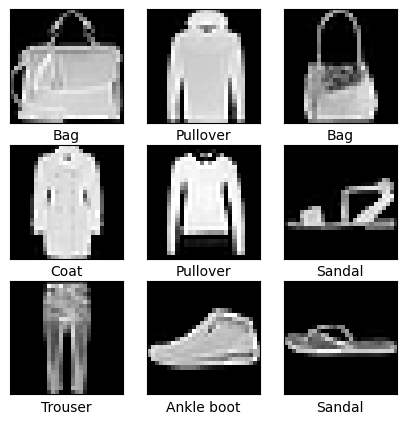

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)

# 0-9 레이블 정보 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


sample_size = 9
# 0 ~ 59999의 범위 내에서 무작위로 9개 정수 추출
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])

plt.show()

## 데이터 전처리

*   데이터 : 스케일링 (범위 축소, 0 ~ 1)
*   레이블 : 범주형으로 변경



In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

## 데이터 : 스케일링 (범위 축소, 0 ~ 1)

In [ ]:
# 값의 범위를 0 ~ 255 -> minMax 알고리즘을 사용 0~1 범위 축소
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### 레이블 : 범주형으로 변경

In [ ]:
from keras.utils import to_categorical

# 실제 정답 비교를 위해 0 ~ 9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('real_y_tset[0]', real_y_test[0])
print('y_test[0]',y_test[0])

real_y_tset[0] 9
y_test[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터셋(70%), 검증 데이터셋(30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)

In [ ]:
print('X_train.shape',X_train.shape)
print('X_val.shape',X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


## 첫 번째 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28))) #Flatten(28,28) -> (28*28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax')) #10개로 최종 출력, softmax

## 첫 번째 모델 설정하기

In [ ]:
first_model.compile(optimizer='adam', # 옵티마이저
              loss='categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

## 첫번째 모델 학습하기

In [ ]:
first_history = first_model.fit(X_train, y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 8s 15ms/step - loss: 0.6831 - acc: 0.7733 - val_loss: 0.4727 - val_acc: 0.8358
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4502 - acc: 0.8439 - val_loss: 0.4365 - val_acc: 0.8421
Epoch 3/30
329/329 [==============================] - 3s 9ms/step - loss: 0.4082 - acc: 0.8562 - val_loss: 0.3994 - val_acc: 0.8581
Epoch 4/30
329/329 [==============================] - 3s 11ms/step - loss: 0.3755 - acc: 0.8661 - val_loss: 0.3883 - val_acc: 0.8628
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3599 - acc: 0.8710 - val_loss: 0.3791 - val_acc: 0.8612
Epoch 6/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3420 - acc: 0.8758 - val_loss: 0.3569 - val_acc: 0.8715
Epoch 7/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3250 - acc: 0.8826 - val_loss: 0.3441 - val_acc: 0.8764
Epoch 8/30
329/329 [==============================] - 4s 12ms/step - loss

## 두번째 모델 구성 및 학습하기

In [ ]:
#모델 구성하기
second_model = Sequential()

second_model.add(Flatten(input_shape=(28,28))) #Flatten(28,28) -> (28*28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax')) #10개로 최종 출력, softmax

second_model.compile(optimizer='adam', # 옵티마이저
              loss='categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

second_history = second_model.fit(X_train, y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6293 - acc: 0.7825 - val_loss: 0.4920 - val_acc: 0.8213
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4293 - acc: 0.8478 - val_loss: 0.3889 - val_acc: 0.8624
Epoch 3/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3794 - acc: 0.8631 - val_loss: 0.3621 - val_acc: 0.8737
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3479 - acc: 0.8739 - val_loss: 0.3581 - val_acc: 0.8715
Epoch 5/30
329/329 [==============================] - 2s 8ms/step - loss: 0.3287 - acc: 0.8800 - val_loss: 0.3395 - val_acc: 0.8778
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3106 - acc: 0.8858 - val_loss: 0.3484 - val_acc: 0.8736
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3003 - acc: 0.8893 - val_loss: 0.3316 - val_acc: 0.8809
Epoch 8/30
329/329 [==============================] - 3s 9ms/step - loss: 0.

## 모델 학습 결과 분석

*   두 모델 모두 과대적합의 경향이 있다.
*   첫번째 모델은 epoch 12 이후부터 손실값이 상승하고, 훈련 정확도가 검증 정확도와의 차이가 발생함 -> epoch12 학습시킨 후 평가
*   두번째 모델은 epoch 10 이후부터 손실값이 상승하고, 훈련 정확도가 검증 정확도와의 차이가 발생함 -> epoch10 학습시킨 후 평가



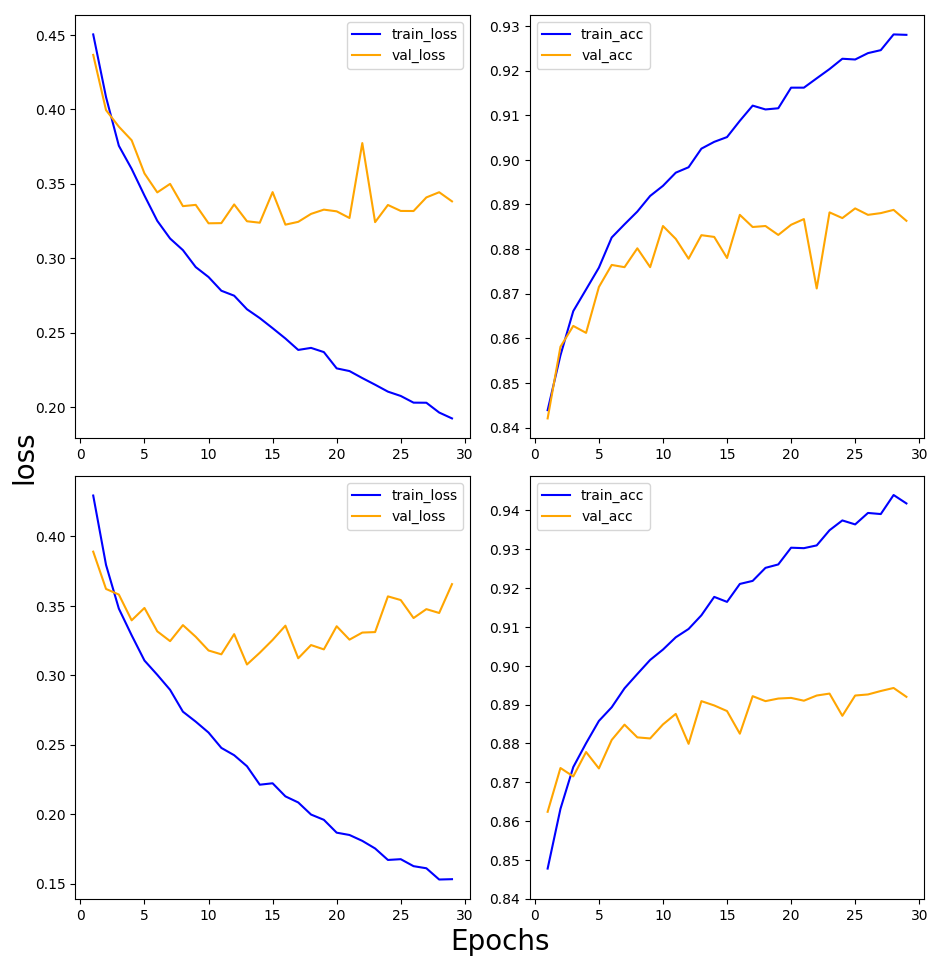

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)

## 모델 성능 평가 비교

In [ ]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4164 - acc: 0.8812


[0.4163569211959839, 0.8812000155448914]

## 혼동 행렬

*   first_model : 0('T-shirt/top'), 2(Pullover), 6(Shirt) index -> 정확도 낮음 -> 데이터 추가 -> 추가학습 필요
*   second_model : 6(Shirt) index -> 정확도 낮음 -> 데이터 추가 -> 추가학습 필요 (유독 6번 레이블 ->0번 레이블로 많이 예측)



313/313 [==============================] - 1s 2ms/step


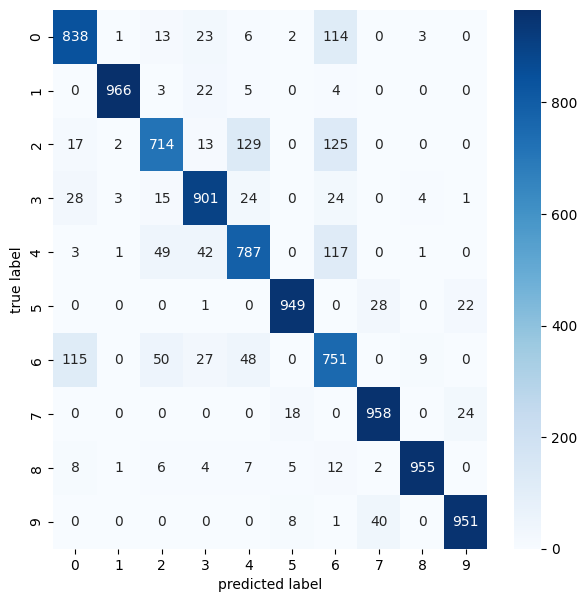

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#모델 예측
y_pred = first_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

313/313 [==============================] - 1s 2ms/step


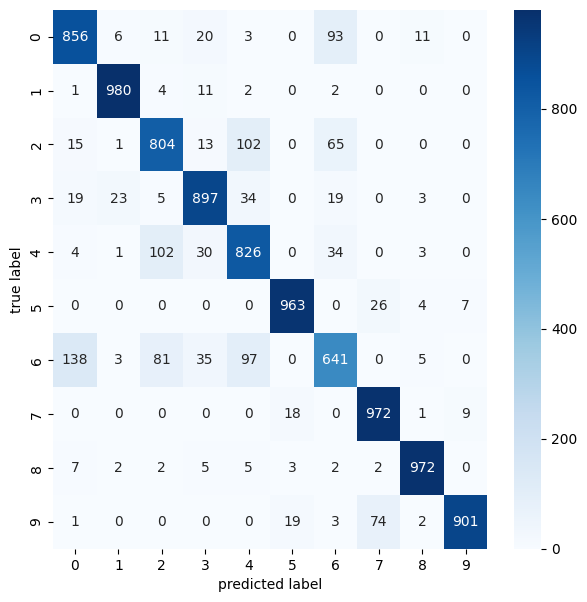

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#모델 예측
y_pred = second_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## 모델 예측해서 그려보기

313/313 [==============================] - 1s 2ms/step


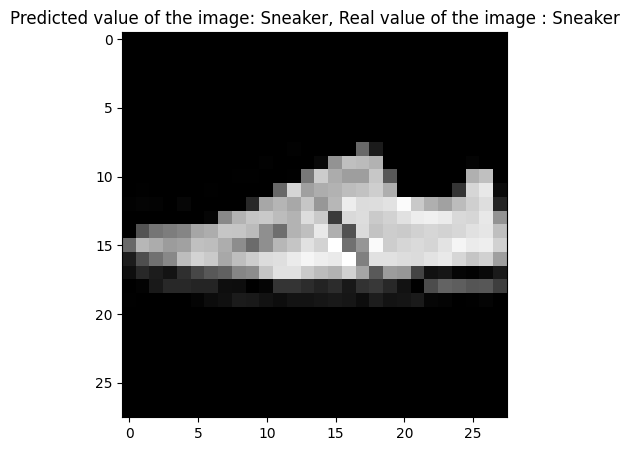

In [ ]:
results = first_model.predict(X_test)
arg_results = np.argmax(results, axis=1)

random_idx = np.random.randint(10000)

plt.figure(figsize=(5,5))
plt.imshow(X_test[random_idx], cmap='gray')
plt.title('Predicted value of the image: ' + class_names[arg_results[random_idx]] + ', Real value of the image : ' + class_names[real_y_test[random_idx]])

plt.show()


# 세 번째 모델 구성

*   256, 128, 64, 32, 10 5개의 레이어로 모델 구성
*   모델 설정, 학습 이전 모델과 동일하게 설정
*   모델 학습 후 history 변수에 담아 결과 분석
*   모델 성능평가(evaluate(), 혼동행렬) 그리고 향후 발전방향 수립
*   수요일에 랜덤하게 2팀 뽑아서 발표

레이어만 추가하고 변수만 추가 - 차트 추가